# Este colab tem como objetivo estudar o comportamento da base do tesouro direto

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import itables
# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

## 1. Extracao dos Dados

In [85]:
# dados_tesouro_principal = pd.read_parquet("./data/sample_investidor_tesouro_direto.parquet")
dados_tesouro_principal = pd.read_parquet("./data/base_completa_investidor_tesouro_direto.parquet")
dados_tesouro = dados_tesouro_principal.copy().sample(n=50000, random_state=42)
del dados_tesouro_principal
import gc
gc.collect()

501

## 2. Junção de Macroprofissoes 

#### 2.1 Criando agrupamentos de profissoes

In [86]:
profissoes_agrupadas = {
    "Não CLTs": ["PROFISSIONAL LIBERAL", 'TRABALHADOR AUTÔNOMO'],
    "Outros": [
        "OUTROS", "Não se aplica", "FALECIDO"
    ],
    "Aposentados e Pensionistas": [
        "APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "MILITAR REFORMADO", "PENSIONISTA"
    ],
    "Estudantes e Bolsistas": [
        "BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS", "ESTUDANTE"
    ],
    "Funcionários Públicos": [
        "SERVIDOR PÚBLICO FEDERAL", "SERVIDOR PÚBLICO MUNICIPAL", "SERVIDO PÚBLICO ESTADUAL",
        "FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO SUPERIOR",
        "OCUPANTE DE CARGO DE DIREÇAO E ASSESSORAMENTO INTERMEDIÁRIO",
        "MEMBRO DO PODER JUDICIÁRIO: MINISTRO DE TRIB. SUPERIOR",
        "MEMBRO DO PODER LEGISLATIVO: SENADOR, DEP.FED.E ESTADUAL",
        "MEMBRO DO PODER EXECUTIVO: PRES.REPÚBLICA, MINISTRO ETC.",
        "DELEGADO DE POLÍCIA", "FISCAL"
    ],
    "Profissionais da Saúde": [
        "MÉDICO", "ODONTÓLOGO E DENTISTA", "ENFERMEIRO E NUTRICIONISTA",
        "FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL", "FARMACÊUTICO", "FONOAUDIÓLOGO",
        "PSICÓLOGO", "BIÓLOGO E BIOMÉDICO", "TÉCNICO DE LABORATÓRIO E RAIO X", 'PROTÉTICO', 'VETERINÁRIO E ZOOTECNISTA'
    ],
    "Engenharia e Tecnologia": [
        "ENGENHEIRO", "TÉCNICO DE MECÂNICA", "TÉCNICO DE ELETRICIDADE, ELETRÔNICA E TELECOMUNICAÇÕES",
        "TÉCNICO DE QUÍMICA", "TÉCNICO DE CONTABILIDADE E DE ESTATÍSTICA",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "TECNOLOGO", "ANALISTA DE SISTEMAS", 'ARQUITETO',
        'TECNÓLOGO'
    ],
    "Direito e Justiça": [
        "ADVOGADO", "PROCURADOR E ASSEMELHADOS", "SERVENTUÁRIO DE JUSTIÇA", "TABELIÃO"
    ],
    "Educação e Pesquisa": [
        "PROFESSOR DE ENSINO SUPERIOR", "PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS",
        "DIRETOR DE ESTABELECIMENTO DE ENSINO",
        'BIBLIOTECÁRIO, ARQUIVISTA, MUSEÓLOGO E ARQUEÓLOGO', 'SOCIÓLOGO',
        'OUTROS TRABALHADORES DE NÍVEL SUPERIOR LIGADOS AO ENSINO'
    ],
    "Ciências Exatas e Humanas": [
        "ECONOMISTA", "SOCIOLOGO", "ESTATÍSTICO", "FÍSICO", "GEÓGRAFO", "GEÓLOGO",
        "ATUÁRIO E MATEMÁTICO"
    ],
    "Comércio e Vendas": [
        "VENDEDOR PRACISTA, REPRESENTANTE COMERCIAL, CAIXEIRO VIAJANTE",
        "VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA", "SECURITÁRIO",
        "CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",
        "FEIRANTE", "JORNALEIRO", "SUPERIOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",'DEMONSTRADOR'
    ],
    "Artes, Comunicação e Entretenimento": [
        "JORNALISTA", "PUBLICITÁRIO", "COMUNICÓLOGO", "RELAÇÕES PÚBLICAS",
        "ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS", "CANTOR E COMPOSITOR", "MÚSICO",
        "LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E RADIALISTA",
        "DESENHISTA COMERCIAL", "DESENHISTA TÉCNICO", "DESENHISTA INDUSTRIAL",
        "DECORADOR", "MODELO DE MODAS", "COREÓGRAFO E BAILARINO",
        "PROFISSIONAIS DE LETRAS E DE ARTES", "ESCULTOR, PINTOR E ASSEMELHADOS",
        "DIPLOMATA", "AGENCIADOR DE PROPAGANDA", "OPERADOR DE CÂMARA DE CINEMA E TELEVISÃO"
    ],
    "Administração e Negócios": [
        "ADMINISTRADOR", "GERENTE", "DIRETOR DE EMPRESAS", "COORDENADOR E SUPERVISOR",
        "CONSULTOR", "EMPRESÁRIO", "EMPRESÁRIO ARTÍSTICO E PRODUTOR DE ESPETÁCULOS PÚBLICOS"
    ],
    "Contabilidade e Finanças": [
        "BANCARIO E ECONOMIÁRIO", "CONTADOR", "TRABALHADOR DOS SERVIÇOS DE CONTABILIDADE, DE CAIXA"
    ],
    "Transportes e Logística": [
        "PILOTO DE AERONAVES", "MOTORISTA DE VEÍCULOS DE TRANSPORTE DE PASSAGEIROS",
        "MOTORISTA DE VEICULOS DE TRANSPORTE DE CARGA", "COMISSÁRIO DE BORDO",
        "MAQUINISTA E FOGUISTA DE EMBARCAÇÕES, LOCOMOTIVAS", "COMANDANTE DE EMBARCAÇOES",
        "CONTRAMESTRE DE EMBARCAÇÕES", 'MARINHEIRO E ASSEMELHADOS'
    ],
    "Trabalho Operacional e Técnicos": [
        "MECÂNICO DE MANUTENÇÃO DE VEÍCULOS AUTOMÓVEIS E MÁQUINAS",
        "ELETRICISTA E ASSEMELHADOS", "LANTERNEIRO E PINTOR DE VEÍCULOS METÁLICOS",
        "ELETRICISTA DE MANUTENÇÃO DE VEÍCULOS AUTOMOTORES MÁQUINAS",
        "MECANICO DE MANUTENÇÃO, MONTADOR, PREPARADOR, OPERADOR"
    ],
    "Serviços Gerais": [
        "AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS", "AGENTE ADMINISTRATIVO",
        "PORTEIRO DE EDIFÍCIO, ASCENSORISTA, GARAGISTA E FAXINEIRO",
        "SECRETARIO, ESTENÓGRAFO, DATILÓGRAFO, RECEPCIONISTA,TELEF.",
        "EMPREGADO DOMÉSTICO", "AUXILIAR DE LABORATORIO", "GOVERNANTA DE HOTEL, CAMAREIRO, PORTEIRO, COZINHEIRO"
    ],
    "Religião e Assistência Social": [
        "SACERDOTE OU MEMBRO DE ORDENS OU SEITAS RELIGIOSAS", "ASSISTENTE SOCIAL"
    ],
    "Forças de Segurança e Defesa": [
        "MILITAR EM GERAL", "OFICIAIS DAS FORÇAS ARMADAS E FORÇAS AUXILIARES", "BOMBEIRO"
    ],
    "Proprietários e Renda Passiva": [
        "PROPRIETÁRIO DE ESTABELECIMENTO INDUSTRIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL",
        "PROPRIETÁRIO DE ESTABELECIMENTO DE PRESTAÇÃO DE SERVIÇOS",
        "PROPRIETARIO DE MICROEMPRESAS",
        "PROPRIETÁRIO DE IMÓVEL (RECEBENDO RENDIMENTO DE ALUGUEL)",
        "PROPRIETÁRIO DE ESTABELECIMENTO AGRÍCOLA, DA PECUÁRIA",
        "CAPITALISTA, RECEBENDO RENDIMENTO DE APLICAÇÃO DE CAPITAL"
    ],
    "Trabalhadores Rurais e Agropecuários": [
        "TRABALHADOR AGRÍCOLA", "TRABALHADOR DA PECUÁRIA", "AGRONOMO",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA", "GARIMPEIRO", "TRABALHADOR FLORESTAL", 'TRABALHADOR DA PESCA'
    ],
    "Trabalho Industrial e Produção": [
        "TRABALHADOR DE CONSTRUÇÃO CIVIL", "TRABALHADOR METALÚRGICO E SIDERÚRGICO",
        "TRABALHADOR DE FABRICAÇÃO DE ROUPAS", "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS DE BORRACHA E PLÁSTICO",
        "TRABALHADOR DE FABRICAÇÃO E PREPARAÇÃO DE ALIMENTOS BEBIDAS",
        "TRABALHADOR DE FABRICAÇÃO DE PRODUTOS TÊXTEIS", "TRABALHADOR DE USINAGEM E METAIS",
        "TRABALHADOR DE FABRICAÇÃO DE CALÇADOS E ARTEFATOS DE COURO",
        "TRABALHADOR DE FABRICAÇÃO DE PAPEL E PAPELÃO", "TRABALHADOR DE ARTES GRÁFICAS",
        "TRABALHADOR DE INSTALAÇÕES DE PROCESSAMENTO QUÍMICO",
        "TRABALHADOR DE TRATAMENTO DE FUMO E DE FABR. CIGARROS",
        "TRABALHADOR DE FABRICAÇÃO DE ARTEFATOS DE MADEIRA"
    ],
    "Serviços Específicos": [
        "CABELEIREIRO, BARBEIRO, MANICURE, PEDICURE, MAQUILADOR",
        "LEILOEIRO, AVALIADOR E ASSEMELHADOS", "DESPACHANTE, INCLUSIVE O ADUANEIRO",
        "AGENTE DE SERVIÇOS FUNERÁRIOS E EMBALSAMADOR", "AGENTE DE VIAGEM E GUIA DE TURISMO"
    ],
    "Ciências Naturais e Exatas": [
        "ASTRÔNOMO E METEOROLOGISTA", "QUIMICO", "TÉCNICO DE BIOLOGIA"
    ],
    "Artesanato e Joalheria": [
        "JOALHEIROS E OURIVES", "ALFAIATE"
    ],
    "Esporte": [
        "ATLETA PROFISSIONAL E TÉCNICO EM DESPORTOS"
    ],
    "Carga e Logística Manual": [
        "ESTIVADOR, CARREGADOR, EMBALADOR E ASSEMELHADOS"
    ],
    "Direção e Liderança": [
        "CHEFE INTERMEDIÁRIO", "MESTRE E CONTRAMESTRE"
    ]
}
# Primeiro, invertemos o dicionário: cada profissão vira uma chave apontando para sua área
profissao_para_grupo = {}
for grupo, profissoes in profissoes_agrupadas.items():
    for profissao in profissoes:
        profissao_para_grupo[profissao] = grupo

# Agora aplicamos isso no DataFrame
dados_tesouro['Grupo_Profissao'] = dados_tesouro['Profissao'].map(profissao_para_grupo)


#### 2.4.2 Criando agrupamento de macroprofissoes

In [87]:
macrogrupo_para_grupos = {
    'Economia, Negócios e Administração': [
        'Contabilidade e Finanças',
        'Administração e Negócios',
        'Comércio e Vendas',
        'Proprietários e Renda Passiva',
        'Direção e Liderança'
    ],
    'Serviços Públicos e Segurança': [
        'Funcionários Públicos',
        'Forças de Segurança e Defesa',
        'Religião e Assistência Social',
        'Direito e Justiça'
    ],
    'Educação, Ciência e Pesquisa': [
        'Educação e Pesquisa',
        'Ciências Naturais e Exatas',
        'Ciências Exatas e Humanas',
        'Estudantes e Bolsistas'
    ],
    'Saúde e Bem-estar': [
        'Profissionais da Saúde',
        'Aposentados e Pensionistas'
    ],
    'Engenharia, Tecnologia e Produção': [
        'Engenharia e Tecnologia',
        'Trabalho Industrial e Produção'
    ],
    'Arte, Cultura e Comunicação': [
        'Artes, Comunicação e Entretenimento',
        'Artesanato e Joalheria'
    ],
    'Serviços Gerais e Técnicos': [
        'Serviços Gerais',
        'Serviços Específicos',
        'Trabalho Operacional e Técnicos'
    ],
    'Transporte e Logística': [
        'Transportes e Logística',
        'Carga e Logística Manual'
    ],
    'Agricultura e Meio Rural': [
        'Trabalhadores Rurais e Agropecuários'
    ],
    'Esporte': [
        'Esporte'
    ],
    'Outros': [
        'Outros'
    ],
    'Nao CLTs': [
        'Não CLTs'
    ]
}

# 2. Mapeia o grupo para o macrogrupo
grupo_para_macrogrupo = {}
for macro, grupos in macrogrupo_para_grupos.items():
    for grupo in grupos:
        grupo_para_macrogrupo[grupo] = macro

# 3. Aplica os mapeamentos no DataFrame
dados_tesouro['Macrogrupo_Profissao'] = dados_tesouro['Grupo_Profissao'].map(grupo_para_macrogrupo)



In [90]:
dados_tesouro.columns

Index(['Codigo do Investidor', 'Data de Adesao', 'Estado Civil', 'Genero',
       'Profissao', 'Idade', 'UF do Investidor', 'Cidade do Investidor',
       'Pais do Investidor', 'Situacao da Conta', 'Operou 12 Meses',
       'Grupo_Profissao', 'Macrogrupo_Profissao'],
      dtype='object')

In [ ]:
dados_tesouro.to_csv('./data/base_tesouro_direto_macro_profissoes.csv', sep=';')

In [71]:
len(dados_tesouro['Macrogrupo_Profissao'].unique())

12

In [72]:
table_macroprofissoes = dados_tesouro.groupby(['Macrogrupo_Profissao', 'UF do Investidor']).size().reset_index(name='quantidade_investidores')

In [73]:
len(table_macroprofissoes['Macrogrupo_Profissao'].unique())

12

In [74]:
table_human_density = pd.read_csv('./another_datas/human_density.csv',sep='\t')
table_human_density = table_human_density[['UF','População (2022)']]

In [75]:
table_macroprofissoes

,Macrogrupo_Profissao,UF do Investidor,quantidade_investidores
0,Agricultura e Meio Rural,AC,1405
1,Agricultura e Meio Rural,AL,5272
2,Agricultura e Meio Rural,AM,3560
3,Agricultura e Meio Rural,AP,925
4,Agricultura e Meio Rural,BA,30948
...,...,...,...
321,Transporte e Logística,RS,54561
322,Transporte e Logística,SC,51285
323,Transporte e Logística,SE,7565
324,Transporte e Logística,SP,375821


In [76]:
profissoes_density = pd.merge(table_macroprofissoes, table_human_density, left_on='UF do Investidor', right_on='UF', how='inner')
profissoes_density['investidores_por_100k'] = (profissoes_density['quantidade_investidores'] / profissoes_density['População (2022)']) * 100000
# profissoes_density[profissoes_density['UF'] == 'AC']

In [82]:
profissoes_density.columns

Index(['Macrogrupo_Profissao', 'UF do Investidor', 'quantidade_investidores',
       'UF', 'População (2022)', 'investidores_por_100k'],
      dtype='object')

In [83]:
profissoes_density

,Macrogrupo_Profissao,UF do Investidor,quantidade_investidores,UF,População (2022),investidores_por_100k
0,Agricultura e Meio Rural,AC,1405,AC,829780,169.321989
1,Agricultura e Meio Rural,AL,5272,AL,3125254,168.690289
2,Agricultura e Meio Rural,AM,3560,AM,3952262,90.075000
3,Agricultura e Meio Rural,AP,925,AP,774268,119.467678
4,Agricultura e Meio Rural,BA,30948,BA,14659023,211.119118
...,...,...,...,...,...,...
319,Transporte e Logística,RS,54561,RS,11088065,492.069626
320,Transporte e Logística,SC,51285,SC,7762154,660.705778
321,Transporte e Logística,SE,7565,SE,2211868,342.018601
322,Transporte e Logística,SP,375821,SP,46024937,816.559510


In [78]:
profissoes_density.to_csv('./data/profissoes_density_populacional.csv',sep=';')

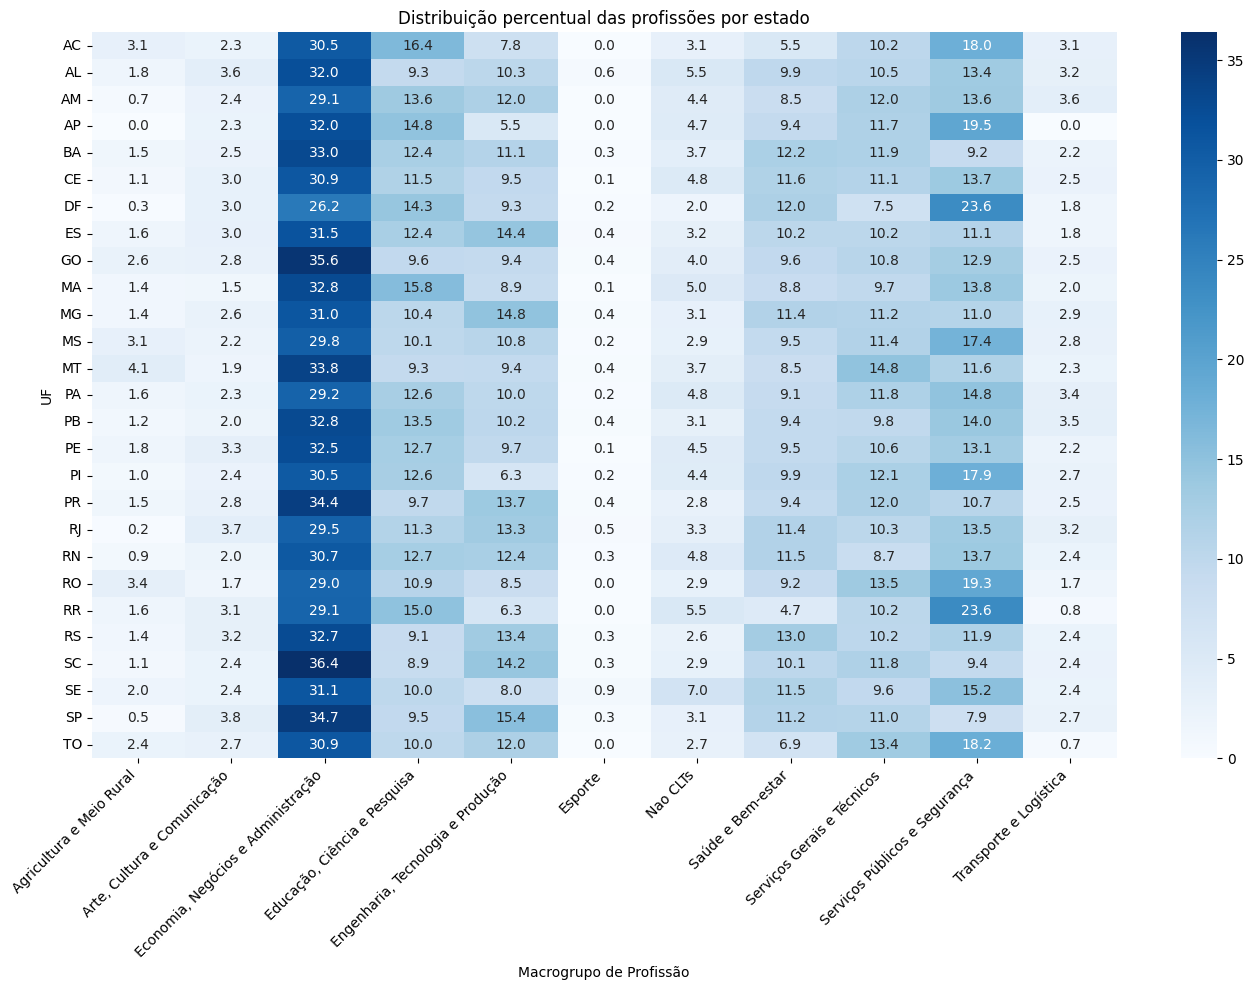

In [13]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Cria a pasta 'images' se não existir
os.makedirs('images', exist_ok=True)

# Plot do gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(tabela_percentual, annot=True, fmt=".1f", cmap="Blues")

plt.title('Distribuição percentual das profissões por estado')
plt.xlabel('Macrogrupo de Profissão')
plt.ylabel('UF')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, ha='right')
plt.tight_layout()

# Salvar o gráfico na pasta images
plt.savefig('images/distribuicao_profissoes_por_estado.png', dpi=300)

# Exibir o gráfico
plt.show()
